# Data Science Project

* Name: Author Name
* Email:


## TABLE OF CONTENTS 


- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
___

In [1]:
# from IPython import display as dp
# with open('OSEMN.md') as f:
#     dp.display(dp.Markdown(f.read()))

# INTRODUCTION

> Explain the point of your project and what question you are trying to answer with your modeling.



# OBTAIN

- Data is From Iowa Department of Corrections:
    - https://data.iowa.gov/Correctional-System/3-Year-Recidivism-for-Offenders-Released-from-Pris/mw8r-vqy4
    
- Direct Export Download Link:
    - https://data.iowa.gov/api/views/mw8r-vqy4/rows.csv?accessType=DOWNLOAD&api_foundry=true
    
    
- IOWA DATA API [To Do]
    - Documentation:
        - https://dev.socrata.com/foundry/data.iowa.gov/mw8r-vqy4
    - Iowa API url = https://data.iowa.gov/resource/mw8r-vqy4.csv

In [2]:
# !pip install -U fsds
from fsds.imports import *

fsds v0.2.25 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [3]:
## DOWNLOAD DATASET
url = "https://data.iowa.gov/api/views/mw8r-vqy4/rows.csv?accessType=DOWNLOAD&api_foundry=true"
df = pd.read_csv(url) 
df

,Fiscal Year Released,Recidivism Reporting Year,Main Supervising District,Release Type,Race - Ethnicity,Age At Release,Sex,Offense Classification,Offense Type,Offense Subtype,Return to Prison,Days to Return,Recidivism Type,New Offense Classification,New Offense Type,New Offense Sub Type,Target Population
0,2010,2013,7JD,Parole,Black - Non-Hispanic,25-34,Male,C Felony,Violent,Robbery,Yes,433.0,New,C Felony,Drug,Trafficking,Yes
1,2010,2013,NaN,Discharged – End of Sentence,White - Non-Hispanic,25-34,Male,D Felony,Property,Theft,Yes,453.0,Tech,NaN,NaN,NaN,No
2,2010,2013,5JD,Parole,White - Non-Hispanic,35-44,Male,B Felony,Drug,Trafficking,Yes,832.0,Tech,NaN,NaN,NaN,Yes
3,2010,2013,6JD,Parole,White - Non-Hispanic,25-34,Male,B Felony,Other,Other Criminal,No,NaN,No Recidivism,NaN,NaN,NaN,Yes
4,2010,2013,NaN,Discharged – End of Sentence,Black - Non-Hispanic,35-44,Male,D Felony,Violent,Assault,Yes,116.0,Tech,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26015,2015,2018,NaN,Paroled to Detainer - INS,White - Hispanic,Under 25,Male,C Felony,Violent,Assault,No,NaN,No Recidivism,NaN,NaN,NaN,Yes
26016,2015,2018,6JD,Released to Special Sentence,White - Non-Hispanic,35-44,Male,C Felony,Violent,Sex,No,NaN,No Recidivism,NaN,NaN,NaN,No
26017,2015,2018,5JD,Parole Granted,White - Non-Hispanic,25-34,Female,Aggravated Misdemeanor,Public Order,Traffic,No,NaN,No Recidivism,NaN,NaN,NaN,No
26018,2015,2018,5JD,Paroled w/Immediate Discharge,White - Non-Hispanic,25-34,Male,D Felony,Property,Theft,No,NaN,No Recidivism,NaN,NaN,NaN,Yes


### Notes:

- Target = `Return to Prison`

**Columns to remove:**
- Any columns that contain information about the new crime committed by recidivists.
    - New Offense Classification
    - New Offense Type 
    - New Offense Sub Type 
- Recidivism Reporting Year (only care about Year Released)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fiscal Year Released        26020 non-null  int64  
 1   Recidivism Reporting Year   26020 non-null  int64  
 2   Main Supervising District   16439 non-null  object 
 3   Release Type                24258 non-null  object 
 4   Race - Ethnicity            25990 non-null  object 
 5   Age At Release              26017 non-null  object 
 6   Sex                         26017 non-null  object 
 7   Offense Classification      26020 non-null  object 
 8   Offense Type                26020 non-null  object 
 9   Offense Subtype             26020 non-null  object 
 10  Return to Prison            26020 non-null  object 
 11  Days to Return              8681 non-null   float64
 12  Recidivism Type             26020 non-null  object 
 13  New Offense Classification  671

In [5]:
drop_cols = [col for col in df.columns if 'New' in col]
drop_cols.extend([col for col in df.columns if 'Year' in col])#('Recidivism Reporting Year')
drop_cols.append('Days to Return')
drop_cols.append('Recidivism Type')
drop_cols

['New Offense Classification',
 'New Offense Type',
 'New Offense Sub Type',
 'Fiscal Year Released',
 'Recidivism Reporting Year',
 'Days to Return',
 'Recidivism Type']

In [6]:
df.drop(columns=drop_cols,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Main Supervising District  16439 non-null  object
 1   Release Type               24258 non-null  object
 2   Race - Ethnicity           25990 non-null  object
 3   Age At Release             26017 non-null  object
 4   Sex                        26017 non-null  object
 5   Offense Classification     26020 non-null  object
 6   Offense Type               26020 non-null  object
 7   Offense Subtype            26020 non-null  object
 8   Return to Prison           26020 non-null  object
 9   Target Population          26020 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26020 entries, 0 to 26019
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Main Supervising District  16439 non-null  object
 1   Release Type               24258 non-null  object
 2   Race - Ethnicity           25990 non-null  object
 3   Age At Release             26017 non-null  object
 4   Sex                        26017 non-null  object
 5   Offense Classification     26020 non-null  object
 6   Offense Type               26020 non-null  object
 7   Offense Subtype            26020 non-null  object
 8   Return to Prison           26020 non-null  object
 9   Target Population          26020 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


# SCRUB

<AxesSubplot:>

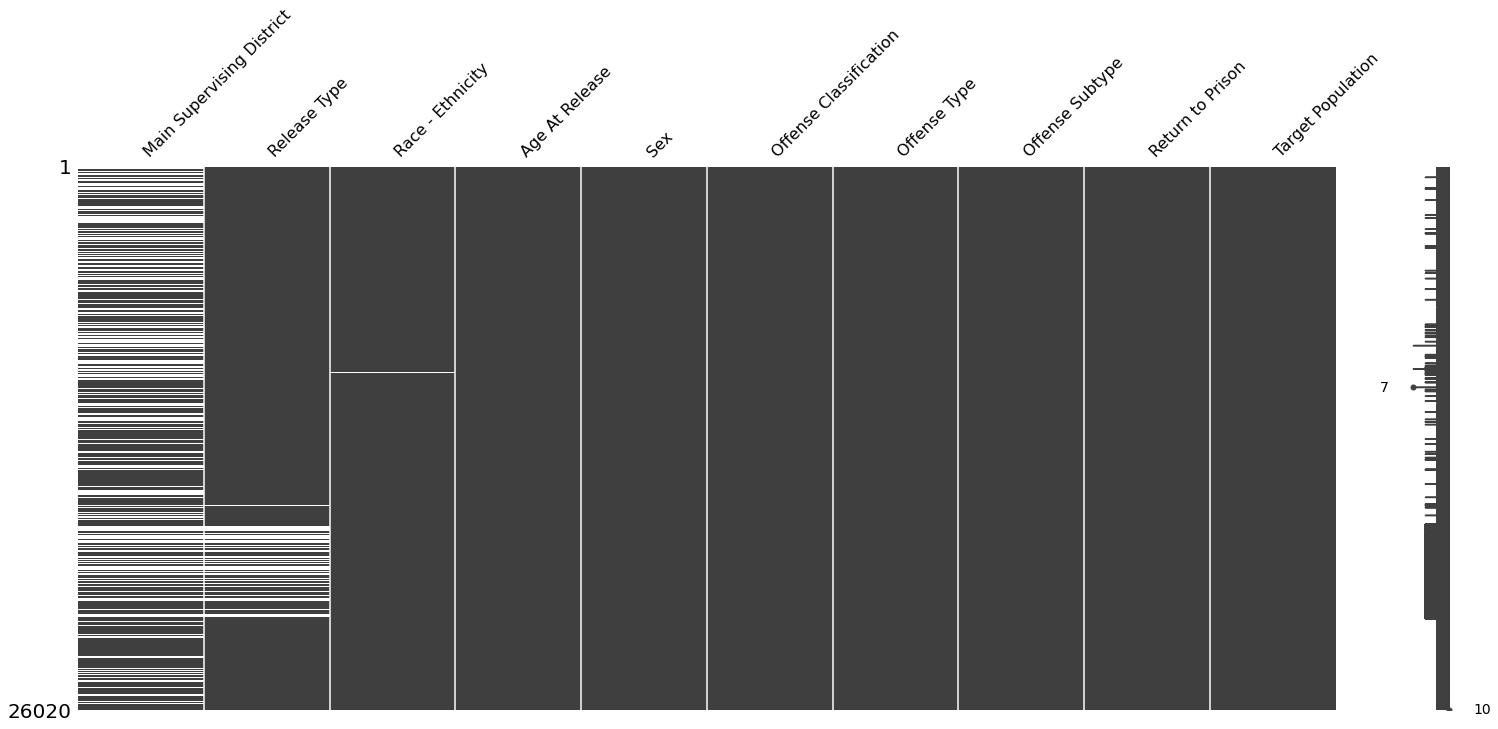

In [8]:
import missingno as ms
ms.matrix(df)

In [9]:
nulls= df.isna().sum()
nulls[nulls > 0] / len(df)

Main Supervising District    0.368217
Release Type                 0.067717
Race - Ethnicity             0.001153
Age At Release               0.000115
Sex                          0.000115
dtype: float64

# EXPLORE

In [10]:
sns.set(style="darkgrid")

In [11]:
def check_counts(df,col,normalize=True):
    """Helper function to display value counts (including NaN)"""
    print(f"There are {df[col].nunique()} unique values in {col}")
    display(df[col].value_counts(normalize=normalize,dropna=False))
    

In [12]:
def plot_values(df, col,fill_val= "NaN"):
    """Plot a seaborn catplot of the categories in col."""
    data = df[[col]].fillna(fill_val).copy()
    counts = data[col].value_counts(ascending=False,dropna=False)
#     display(counts)
    
    ax = sns.countplot(data=data,y=col,
                  order=counts.index)
    ax.set(title=f"Value Counts for {col}")
    plt.show()

In [13]:
def check_column(df, col,normalize=True,fill_val= "NaN"):
    """Combined column inspection function."""
    plot_values(df,col,fill_val=fill_val)
    check_counts(df,col,normalize=normalize)

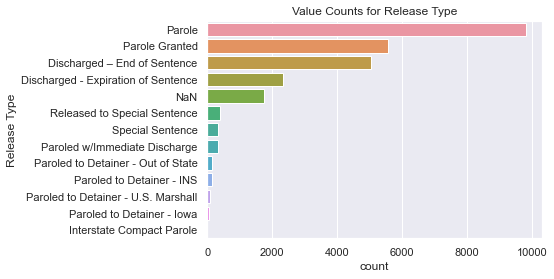

There are 12 unique values in Release Type


Parole                                 0.377018
Parole Granted                         0.214335
Discharged – End of Sentence           0.193659
Discharged - Expiration of Sentence    0.089739
NaN                                    0.067717
Released to Special Sentence           0.015411
Special Sentence                       0.013336
Paroled w/Immediate Discharge          0.012836
Paroled to Detainer - Out of State     0.005265
Paroled to Detainer - INS              0.005150
Paroled to Detainer - U.S. Marshall    0.002959
Paroled to Detainer - Iowa             0.002537
Interstate Compact Parole              0.000038
Name: Release Type, dtype: float64

In [14]:
check_column(df,'Release Type')

In [15]:
## Get list of cat cosl 
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Main Supervising District', 'Release Type', 'Race - Ethnicity',
       'Age At Release ', 'Sex', 'Offense Classification', 'Offense Type',
       'Offense Subtype', 'Return to Prison', 'Target Population'],
      dtype='object')

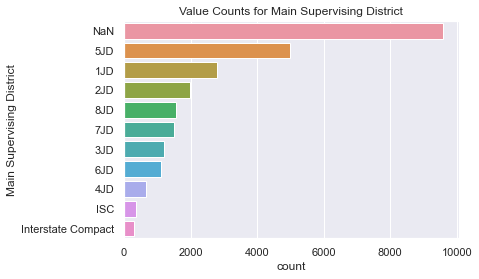

There are 10 unique values in Main Supervising District


NaN                   0.368217
5JD                   0.191468
1JD                   0.107110
2JD                   0.076403
8JD                   0.059800
7JD                   0.058186
3JD                   0.045657
6JD                   0.042198
4JD                   0.025634
ISC                   0.013451
Interstate Compact    0.011875
Name: Main Supervising District, dtype: float64

None

------------------------------------------------------------------------------------------


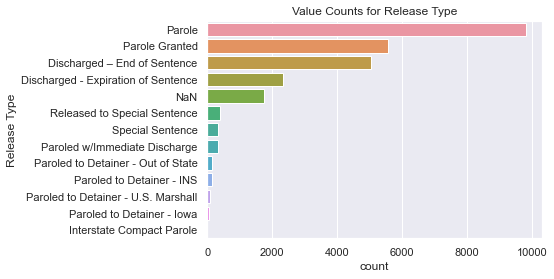

There are 12 unique values in Release Type


Parole                                 0.377018
Parole Granted                         0.214335
Discharged – End of Sentence           0.193659
Discharged - Expiration of Sentence    0.089739
NaN                                    0.067717
Released to Special Sentence           0.015411
Special Sentence                       0.013336
Paroled w/Immediate Discharge          0.012836
Paroled to Detainer - Out of State     0.005265
Paroled to Detainer - INS              0.005150
Paroled to Detainer - U.S. Marshall    0.002959
Paroled to Detainer - Iowa             0.002537
Interstate Compact Parole              0.000038
Name: Release Type, dtype: float64

None

------------------------------------------------------------------------------------------


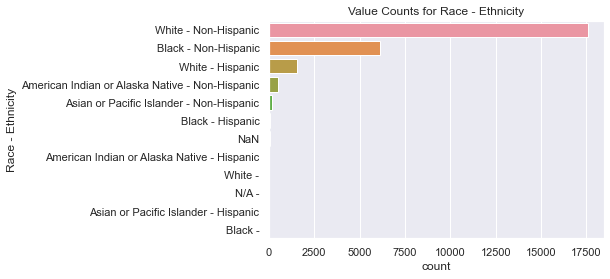

There are 11 unique values in Race - Ethnicity


White - Non-Hispanic                               0.675788
Black - Non-Hispanic                               0.234781
White - Hispanic                                   0.058493
American Indian or Alaska Native - Non-Hispanic    0.019293
Asian or Pacific Islander - Non-Hispanic           0.007379
Black - Hispanic                                   0.001422
NaN                                                0.001153
American Indian or Alaska Native - Hispanic        0.000769
White -                                            0.000461
N/A -                                              0.000192
Asian or Pacific Islander - Hispanic               0.000192
Black -                                            0.000077
Name: Race - Ethnicity, dtype: float64

None

------------------------------------------------------------------------------------------


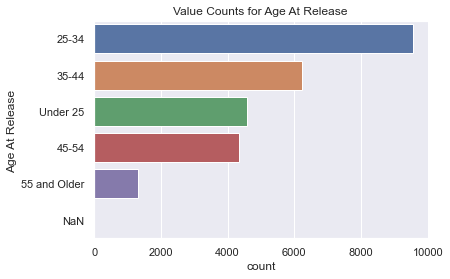

There are 5 unique values in Age At Release 


25-34           0.367179
35-44           0.239162
Under 25        0.176403
45-54           0.167064
55 and Older    0.050077
NaN             0.000115
Name: Age At Release , dtype: float64

None

------------------------------------------------------------------------------------------


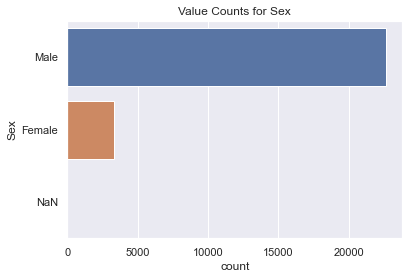

There are 2 unique values in Sex


Male      0.871560
Female    0.128324
NaN       0.000115
Name: Sex, dtype: float64

None

------------------------------------------------------------------------------------------


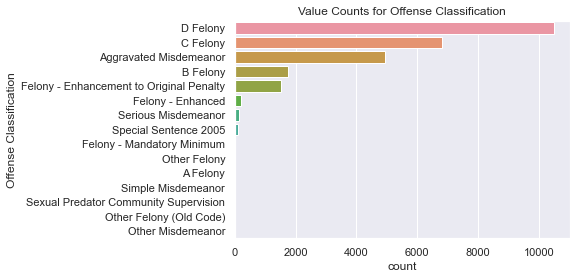

There are 15 unique values in Offense Classification


D Felony                                    0.403036
C Felony                                    0.261453
Aggravated Misdemeanor                      0.189470
B Felony                                    0.067832
Felony - Enhancement to Original Penalty    0.058916
Felony - Enhanced                           0.008455
Serious Misdemeanor                         0.005957
Special Sentence 2005                       0.003766
Felony - Mandatory Minimum                  0.000423
Other Felony                                0.000231
A Felony                                    0.000154
Simple Misdemeanor                          0.000115
Sexual Predator Community Supervision       0.000077
Other Felony (Old Code)                     0.000077
Other Misdemeanor                           0.000038
Name: Offense Classification, dtype: float64

None

------------------------------------------------------------------------------------------


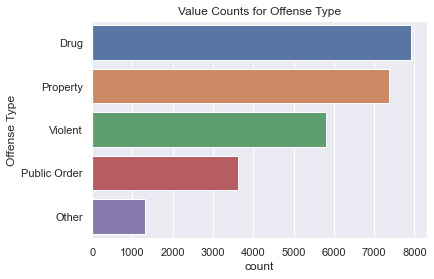

There are 5 unique values in Offense Type


Drug            0.304189
Property        0.283282
Violent         0.223520
Public Order    0.138663
Other           0.050346
Name: Offense Type, dtype: float64

None

------------------------------------------------------------------------------------------


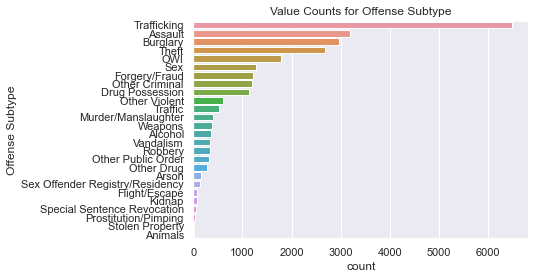

There are 26 unique values in Offense Subtype


Trafficking                        0.249500
Assault                            0.122560
Burglary                           0.113951
Theft                              0.102998
OWI                                0.068870
Sex                                0.049078
Forgery/Fraud                      0.046464
Other Criminal                     0.045772
Drug Possession                    0.043889
Other Violent                      0.023098
Traffic                            0.020138
Murder/Manslaughter                0.015142
Weapons                            0.014297
Alcohol                            0.013682
Vandalism                          0.013336
Robbery                            0.012990
Other Public Order                 0.011952
Other Drug                         0.010799
Arson                              0.006188
Sex Offender Registry/Residency    0.005035
Flight/Escape                      0.003228
Kidnap                             0.002537
Special Sentence Revocation     

None

------------------------------------------------------------------------------------------


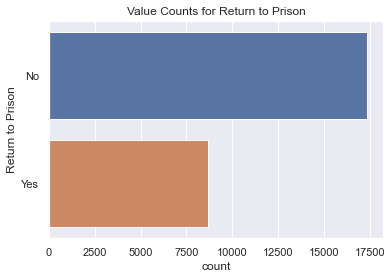

There are 2 unique values in Return to Prison


No     0.666372
Yes    0.333628
Name: Return to Prison, dtype: float64

None

------------------------------------------------------------------------------------------


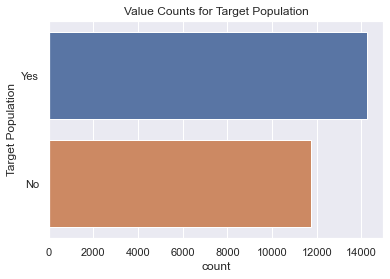

There are 2 unique values in Target Population


Yes    0.548578
No     0.451422
Name: Target Population, dtype: float64

None

------------------------------------------------------------------------------------------


In [16]:
for col in cat_cols:
    display(check_column(df,col))
    print('---'*30)

In [17]:
if "Yes" in df['Return to Prison']:
    df['Return to Prison'] = df['Return to Prison'].map({'Yes':1,'No':0})
else:
    print('Target already encoded.')
df['Return to Prison'].value_counts()

Target already encoded.


No     17339
Yes     8681
Name: Return to Prison, dtype: int64

# MODEL

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='text')

In [19]:
target = 'Return to Prison'
y = df[target].copy()
X = df.drop(columns=target).copy()
X.columns

Index(['Main Supervising District', 'Release Type', 'Race - Ethnicity',
       'Age At Release ', 'Sex', 'Offense Classification', 'Offense Type',
       'Offense Subtype', 'Target Population'],
      dtype='object')

In [20]:
cat_cols = X.select_dtypes('object').columns
cat_cols

Index(['Main Supervising District', 'Release Type', 'Race - Ethnicity',
       'Age At Release ', 'Sex', 'Offense Classification', 'Offense Type',
       'Offense Subtype', 'Target Population'],
      dtype='object')

In [21]:
num_cols = X.select_dtypes('number').columns
num_cols

Index([], dtype='object')

In [22]:
## Numeric Data Pipline
num_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())])
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [23]:
## Categorical Data Pipeline
cat_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'))])
cat_pipe

Pipeline(steps=[('impute',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [24]:
## Combined prepreocessing pipelien
preprocessor = ColumnTransformer(transformers=[
    ('num',num_pipe,num_cols),
    ('cat',cat_pipe,cat_cols)])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)
y_train.value_counts(1)

No     0.666359
Yes    0.333641
Name: Return to Prison, dtype: float64

In [26]:
X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

In [27]:
def remake_df(X_train_tf, preprocessor,num_cols,cat_cols,
              transformer_name='cat',step_name='encoder',index=None):
    """Remakes X data from a ColumnTransformer (preprocessor) pipeline."""
    tf = preprocessor.named_transformers_[transformer_name]
    cat_features = tf.named_steps[step_name].get_feature_names(cat_cols)
    feature_names = [*num_cols,*cat_features]
    
    if index is not None:
        df = pd.DataFrame(X_train_tf, columns=feature_names ,index=index)
    else:
        df = pd.DataFrame(X_train_tf, columns=feature_names)
    return df

In [28]:
X_train_tf = remake_df(X_train_tf,preprocessor,num_cols,cat_cols,index=X_train.index)
X_test_tf = remake_df(X_test_tf,preprocessor,num_cols,cat_cols,index=X_test.index)


In [29]:
X_test_tf

,Main Supervising District_1JD,Main Supervising District_2JD,Main Supervising District_3JD,Main Supervising District_4JD,Main Supervising District_5JD,Main Supervising District_6JD,Main Supervising District_7JD,Main Supervising District_8JD,Main Supervising District_ISC,Main Supervising District_Interstate Compact,...,Offense Subtype_Sex Offender Registry/Residency,Offense Subtype_Special Sentence Revocation,Offense Subtype_Stolen Property,Offense Subtype_Theft,Offense Subtype_Traffic,Offense Subtype_Trafficking,Offense Subtype_Vandalism,Offense Subtype_Weapons,Target Population_No,Target Population_Yes
9884,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
24621,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16419,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13416,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20485,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10925,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4237,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
from xgboost import XGBRFClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_tf,y_train)

RandomForestClassifier(class_weight='balanced')

In [31]:
from sklearn import metrics

              precision    recall  f1-score   support

          No       0.72      0.69      0.70      4335
         Yes       0.43      0.48      0.45      2170

    accuracy                           0.62      6505
   macro avg       0.58      0.58      0.58      6505
weighted avg       0.63      0.62      0.62      6505



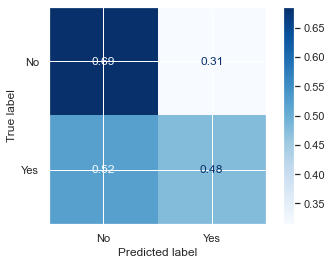

In [32]:

y_hat_test = rf.predict(X_test_tf)
print(metrics.classification_report(y_test, y_hat_test))
metrics.plot_confusion_matrix(rf,X_test_tf,y_test,cmap='Blues',
                             normalize='true')

In [33]:
importance = pd.Series(rf.feature_importances_,
                       index=X_train_tf.columns).sort_values(ascending=False)
importance

Main Supervising District_MISSING                 0.045610
Race - Ethnicity_White - Non-Hispanic             0.039174
Race - Ethnicity_Black - Non-Hispanic             0.036861
Age At Release _25-34                             0.035242
Age At Release _35-44                             0.033545
                                                    ...   
Offense Classification_Simple Misdemeanor         0.000035
Offense Classification_Other Misdemeanor          0.000018
Age At Release _MISSING                           0.000005
Sex_MISSING                                       0.000003
Offense Classification_Other Felony (Old Code)    0.000002
Length: 92, dtype: float64

# iNTERPRET

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.

# TO DO/FUTURE WORK

- 